In [1]:
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)


In [2]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7f91b831cd10>)

In [3]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [4]:
df

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,7,915,0,68,328,329,1316,08-Apr-21,2021-04-08,0,3687,12,107,2197,260,969,498,246,2393,2205,32,3,36130,1,3,2296,3,0,228,2480,113,520,2,Recovered,303,1869,3,61829,0,1084,265,957
1172,0,6,0,1,4,1,94,08-Apr-21,2021-04-08,0,24,0,2,35,6,11,7,1,36,18,0,0,376,1,1,27,0,0,0,56,0,20,0,Deceased,7,19,0,802,0,39,3,7
1173,12,2765,2,281,2174,422,11447,09-Apr-21,2021-04-09,0,8521,32,428,4541,662,2994,1925,808,7955,5063,116,6,58993,42,12,4882,36,7,1282,3404,223,3970,6,Confirmed,2478,5441,32,144945,0,9587,748,3648
1174,1,1245,1,38,318,320,2613,09-Apr-21,2021-04-09,0,5032,18,159,2280,501,1970,553,312,3220,2475,64,9,45391,6,8,2433,3,4,310,2518,139,1005,0,Recovered,363,1890,8,77263,0,583,327,1146


In [5]:
df.drop(['dateymd', 'date', 'tt'], axis = 1, inplace=True)

In [6]:
df

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,un,up,ut,wb
0,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,0,12,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,0,4,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,7,915,0,68,328,329,1316,0,3687,12,107,2197,260,969,498,246,2393,2205,32,3,36130,1,3,2296,3,0,228,2480,113,520,2,Recovered,303,1869,3,0,1084,265,957
1172,0,6,0,1,4,1,94,0,24,0,2,35,6,11,7,1,36,18,0,0,376,1,1,27,0,0,0,56,0,20,0,Deceased,7,19,0,0,39,3,7
1173,12,2765,2,281,2174,422,11447,0,8521,32,428,4541,662,2994,1925,808,7955,5063,116,6,58993,42,12,4882,36,7,1282,3404,223,3970,6,Confirmed,2478,5441,32,0,9587,748,3648
1174,1,1245,1,38,318,320,2613,0,5032,18,159,2280,501,1970,553,312,3220,2475,64,9,45391,6,8,2433,3,4,310,2518,139,1005,0,Recovered,363,1890,8,0,583,327,1146


In [7]:
df_ = df.tail(3)
df_.set_index('status', inplace = True)

In [8]:
df_

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Confirmed,12,2765,2,281,2174,422,11447,0,8521,32,428,4541,662,2994,1925,808,7955,5063,116,6,58993,42,12,4882,36,7,1282,3404,223,3970,6,2478,5441,32,0,9587,748,3648
Recovered,1,1245,1,38,318,320,2613,0,5032,18,159,2280,501,1970,553,312,3220,2475,64,9,45391,6,8,2433,3,4,310,2518,139,1005,0,363,1890,8,0,583,327,1146
Deceased,0,11,0,3,3,4,91,0,39,0,3,42,7,11,17,4,46,22,0,0,301,0,0,23,0,0,1,56,0,12,0,5,23,0,0,36,5,8


In [9]:
df_ = df_.T

In [10]:
df_ = df_.apply(pd.to_numeric)

In [11]:
df_

status,Confirmed,Recovered,Deceased
an,12,1,0
ap,2765,1245,11
ar,2,1,0
as,281,38,3
br,2174,318,3
ch,422,320,4
ct,11447,2613,91
dd,0,0,0
dl,8521,5032,39
dn,32,18,0


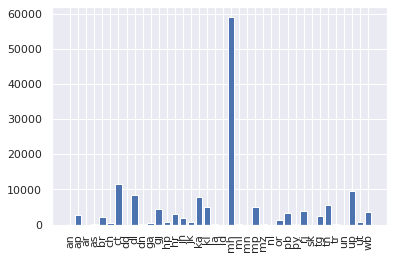

In [12]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

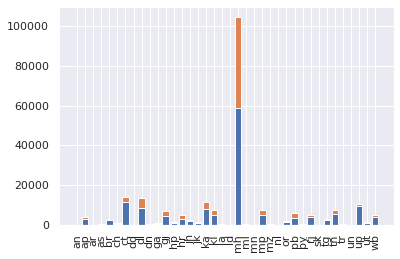

In [13]:
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed)
plt.xticks(rotation=90);

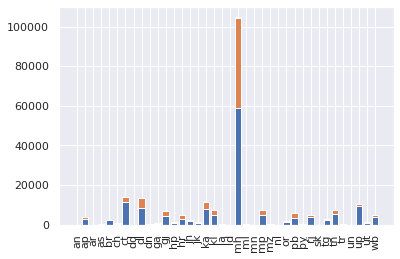

In [14]:
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered)
plt.xticks(rotation=90);

In [15]:
# plt.gcf?

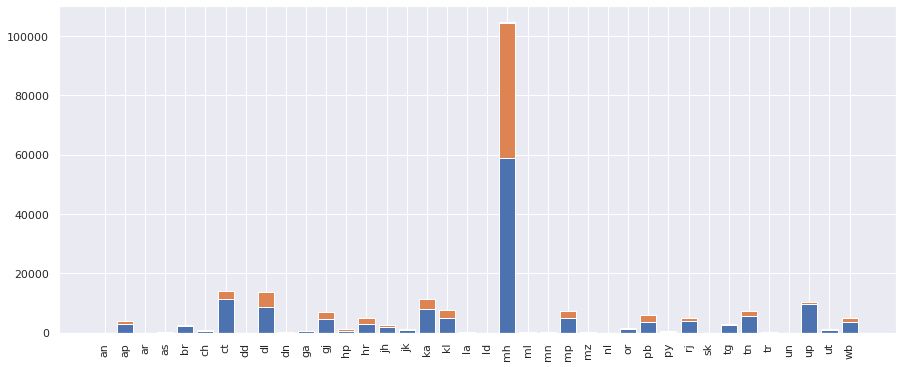

In [16]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.bar(df_.index, df_.Confirmed)
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation=90);

<BarContainer object of 38 artists>

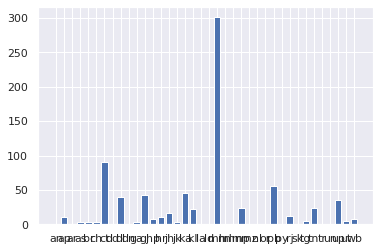

In [17]:
plt.bar(df_.index, df_.Deceased)


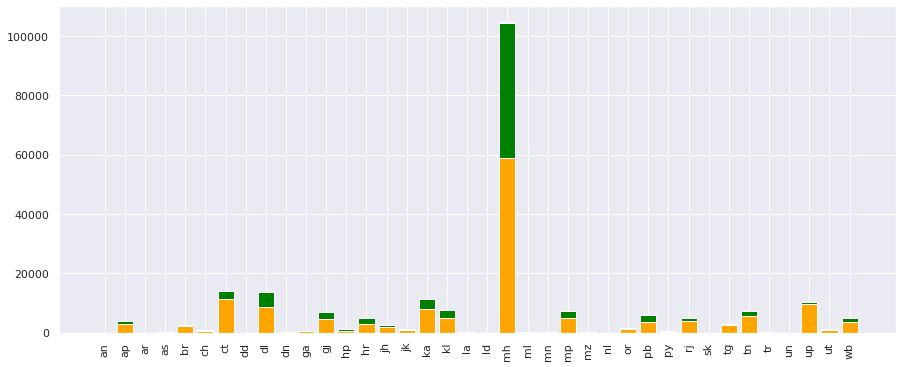

In [18]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

In [19]:
df_.loc['mh']

status
Confirmed    58993
Recovered    45391
Deceased       301
Name: mh, dtype: int64

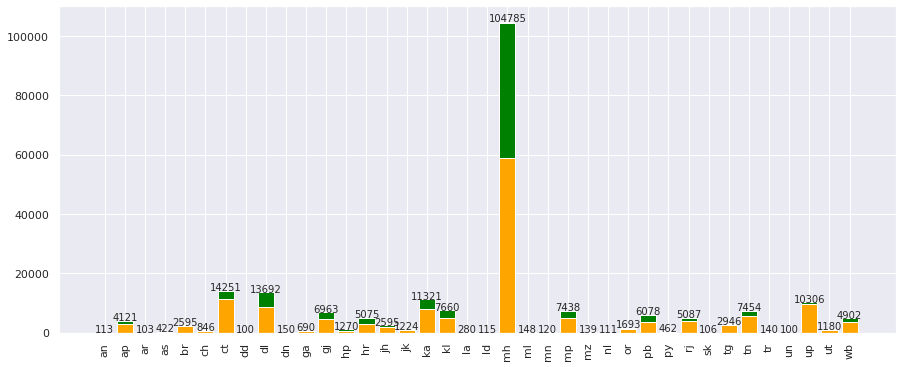

In [20]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100 #100 written to print the number a little above
    x = i
    plt.text(x, y, str(y), ha="center");

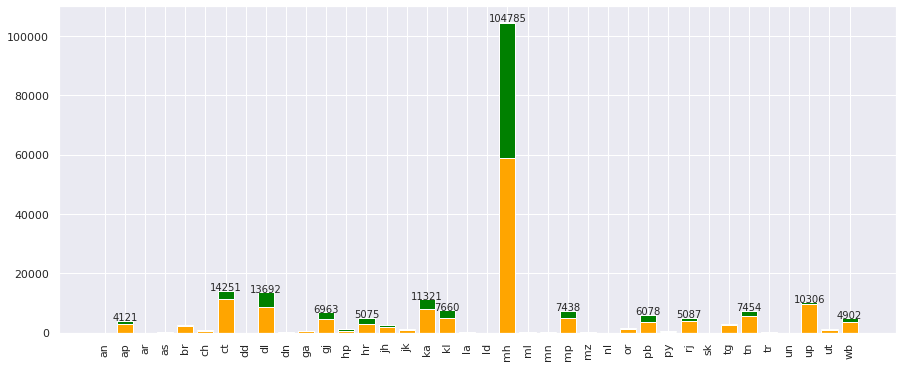

In [21]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.bar(df_.index, df_.Confirmed, color='Orange');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color='Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    if y > 3000:
        x = i
        plt.text(x, y, str(y), ha="center");